## Table of contents:

#### 01. Importing libraries and data  
#### 02. The elbow technique
#### 03. k-means clustering
    Scatterplots
    Conclusions
#### 04. Descriptive statistics
    Conclusions
    What could these results be useful for?

## 1. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [3]:
# import the data files and assign to a dataframe

# setup path to cleaned dataset
path = r'C:\Users\nicol\Chocolate Bar Analysis'
df_cocoa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [4]:
df_cocoa.head()

,Unnamed: 0,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknown,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknown,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknown,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknown,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknown,Peru


In [5]:
# Drop coulumn 'Unnamed: 0'

df_cocoa = df_cocoa.drop(columns = ['Unnamed: 0'])

In [6]:
# Check the column names 

df_cocoa.columns

Index(['Company', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')

In [7]:
# Remove the '%' sign and convert to float for Cocoa Percent column
df_cocoa['Cocoa Percent'] = df_cocoa['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

In [8]:
# Create a subset which contains only the 'Happiness_Score' and indicators

df_sub = df_cocoa[['Rating', 'Cocoa Percent']]

### 02. The elbow technique

In [9]:
# Define the range of potential clusters in the data
num_cl = range(1, 5)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [10]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-417.18005147632243,
 -148.96527963284845,
 -90.67076338929974,
 -55.88365103509852]

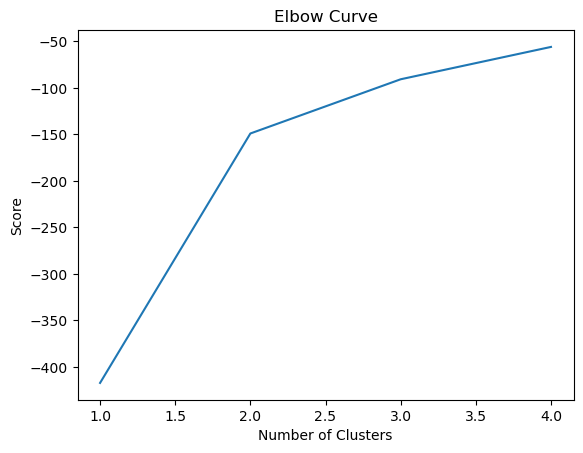

In [11]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is 2.

### 03. k-means clustering

In [12]:
# Create the k-means object with 3 clusters

kmeans = KMeans(n_clusters = 2)
kmeans

KMeans(n_clusters=2)

In [13]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)


C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\AppData\Local\Temp\ipykernel_29328\3560639786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [14]:
df_sub.head()

,Rating,Cocoa Percent,clusters
0,3.75,0.63,0
1,2.75,0.70,1
2,3.00,0.70,1
3,3.50,0.70,0
4,3.50,0.70,0


In [15]:
# Export df to cocoa_cluster1
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cocoa_cluster1.csv'))

In [16]:
df_sub['clusters'].value_counts()

clusters
0    1005
1     790
Name: count, dtype: int64

#### scatterplot

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

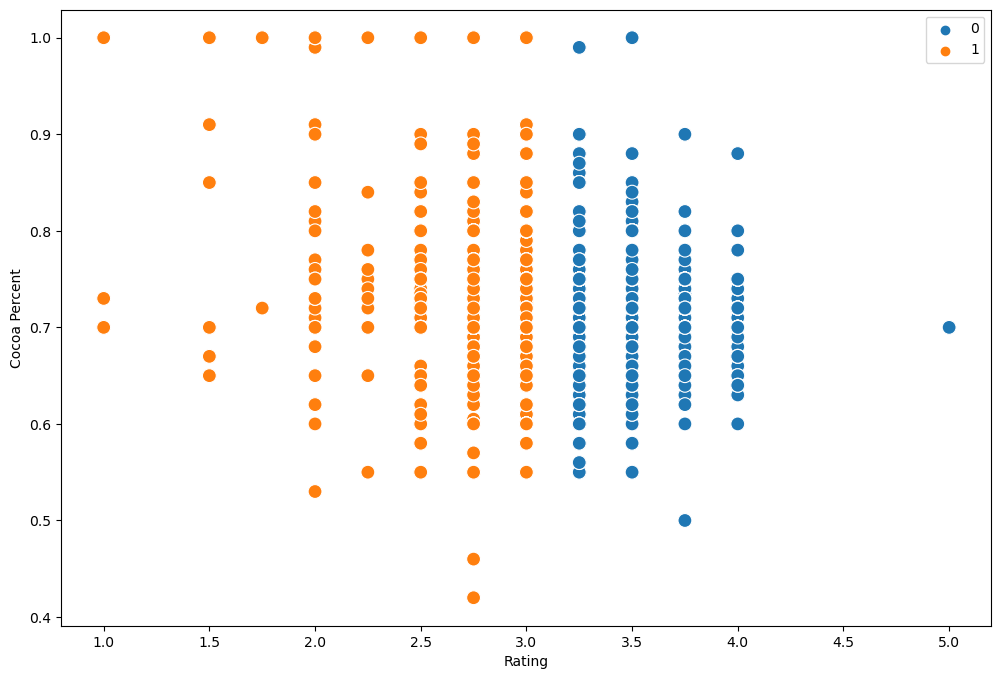

In [17]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_sub['Rating'], y = df_sub['Cocoa Percent'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Rating')
plt.ylabel('Cocoa Percent')
plt.show()

Based on the clusters, the data shows the clusters of 2 or more are at rating 3.5+ and 70%. Both kmeans and scatterplot show the clusters.

### 04. Descriptive statistics

In [18]:
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'orange'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\nicol\AppData\Local\Temp\ipykernel_29328\174379648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'orange'
C:\Users\nicol\AppData\Local\Temp\ipykernel_29328\174379648.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'orange' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'orange'


In [19]:
df_sub.groupby('cluster').agg({'Cocoa Percent':['mean', 'median'], 
                         'Rating':['mean', 'median']})

Cocoa Percent           Rating       
                 mean median      mean median
cluster                                      
blue         0.711348   0.70  3.528607   3.50
orange       0.724152   0.71  2.750000   2.75

Majority of the clusters is at 2.75 rating, and 71%. The insights based on the clusters, it appears that the rating drops as the cocoa percentage rises above 70%.

The results are useful in finding large groups of outliers. If the underlying percentage of cocoa range will lead to a higher rating. 